In [21]:
from NewSectionSegmentation import SectionSegmentation
import pandas as pd
import string
import re
import random
from rdfHandler import rdfObject
import json
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#read in all docs and segment
allDocs = pd.read_csv("full_dataframe.csv")

segmented = SectionSegmentation()
segmented.documents(allDocs)
segmented.sectionSegmentation()

['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', ' PART II', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['    PART I', '    PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'P

['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I'

['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY', ' GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
['PART I', 'PART II']
['GLOSSARY']
[' PART I', ' PART II', 'PART I', 'PART II']
['GLOSSAR

In [3]:
# get the docs that have a glossary
keys = list(segmented.segmented_docs.keys())
has_glossary = []
for key in keys:
    doc = segmented.segmented_docs[key]
    doc_keys = list(doc.keys())
    match = [doc_key for doc_key in doc_keys if re.search("glossary|acronyms|definitions|part", doc_key, flags=re.IGNORECASE)]
    if match:
        has_glossary.append(key)

In [4]:
print("There are {} documents that have glossary section extracted".format(len(has_glossary)))

There are 1000 documents that have glossary section extracted


In [5]:
# get the 1000 docs
glossary_docs = [segmented.segmented_docs[has_glossary[i]] for i in range(len(has_glossary))]

In [6]:
def hasGlossTerm(sent):
    '''
    function that determines if a sentence is a glossary term
    '''
    if sent.islower() and len(sent.strip(' ')) > 3 and len(sent.split()) < 5 and ',' not in sent:
        return True
    else:
        return False

In [7]:
def getGlossaryFromSection(glossary_full_text):
    '''
    extracts the terms and defintions from the glossary section
    takes in text, returns dictionary of terms:defintions
    '''
    glossary = {}
    terms = []
    i=-1
    for sent in glossary_full_text.split("."):
        if hasGlossTerm(sent):
            terms.append([sent.strip(), ""])
            i+=1
        elif terms:
            terms[i][1] += sent.strip()
        else:
            continue
    for pair in terms:
        glossary[pair[0]] = pair[1]
    return glossary

In [8]:
def findAcronyms_Norm(text):
    '''
    recursive function to extract acronyms from text
    '''
    def findMatch(fromStr, toStrList, matchList, isMatch=False):
        if not fromStr or not toStrList:
            rets = " ".join(matchList[::-1])
            return isMatch, rets

        if not toStrList[-1]:
            return findMatch(fromStr, toStrList[:-1], matchList, isMatch)

        if fromStr[-1].lower() not in 'qwertyuiopasdfghjklzxcvbnm':
            return findMatch(fromStr[:-1], toStrList, matchList, isMatch)

        if toStrList and fromStr[-1].lower() == toStrList[-1][0].lower():
            if matchList and toStrList[-1] != matchList[-1]:
                newMatchList = [x for x in matchList] + toStrList[-1:]
            else:
                newMatchList = toStrList[-1:]
            isMatch, rets = findMatch(fromStr[:-1], toStrList[:-1], newMatchList, True)
            if isMatch:
                return isMatch, rets

        if toStrList and toStrList[-1].lower() in ["and", "of", "for", "to"]:
            newMatchList = [x for x in matchList] + toStrList[-1:]
            isMatch, rets = findMatch(fromStr, toStrList[:-1], newMatchList, True)
            if isMatch:
                return isMatch, rets

        if matchList and fromStr[-1].lower() in matchList[-1][0].lower():
            isMatch, rets = findMatch(fromStr[:-1], toStrList, matchList, False)
            if isMatch:
                return isMatch, rets

        if toStrList:
            isMatch, rets = findMatch(fromStr, toStrList[:-1], matchList, False)
        return False, ""

    acronym_table = {}
    SEARCH_RANGE = 9
    # Assumes acronyms are defined in the form: (ToS) Terms of Service
    for result in [r for r in re.finditer(r'[(]([a-z]+)?[A-Z]+([a-zA-Z]+)?[)]', text, re.M|re.A)]:
        stIdx, edIdx = result.span()
        index = stIdx - 1
        for _ in range(SEARCH_RANGE):
            index = max(text.rfind(" ", 0, index), 0)
        acronym, phrase = text[stIdx + 1:edIdx -1], text[index:stIdx - 1].replace('-', ' ').split(" ")
        # TODO(Mike): add mutliple acronyms
        if acronym not in acronym_table or type(acronym_table[acronym]) == list:
            found, match = findMatch(acronym, phrase, [])
            if found:
                acronym_table[acronym] = match
    for result in [r for r in re.finditer(r'^[A-Z][a-zA-Z\(&\)]+', text, re.M|re.A)]:
        stIdx, edIdx = result.span()
        index = stIdx - 1
        for _ in range(SEARCH_RANGE):
            index = max(text.rfind(" ", 0, index), 0)
        acronym, phrase = text[stIdx + 1:edIdx -1], text[index:stIdx - 1].split(" ")
        # TODO(Mike): add mutliple acronyms
        if acronym not in acronym_table or type(acronym_table[acronym]) == list:
            found, match = findMatch(acronym, phrase, [])
            if found:
                acronym_table[acronym] = match
    return acronym_table

In [9]:
# extract glossary terms and acronyms from the 1000 documents
count = 0
glossary = []
acronyms = []
for section in glossary_docs:
    for key, value in section.items():
        for word in key.split(" "):
            if word.lower() in ['glossary', 'GLOSSARY', 'acronyms', 'definitions', 'part', 'part i', 'part ii', 'i', 'ii', 'i.', 'ii.']:
                glossary_terms = getGlossaryFromSection(value)
                acronym_terms = findAcronyms_Norm(value)
                if len(glossary_terms) > 0:
                    glossary.append(glossary_terms)
                if len(acronym_terms) > 0:
                    acronyms.append(acronym_terms)
    count += 1
    if count % 250 == 0:
        print("Done with {} docs.".format(count))

Done with 250 docs.
Done with 500 docs.
Done with 750 docs.
Done with 1000 docs.


## Glossary Dataframe

In [13]:
# Explore glossary terms and create dataframe
gloss_count = 0
glossary_term_doc = []
glossary_def_doc = []
for gloss_dict in glossary:
    for key, value in gloss_dict.items():
        glossary_term_doc.append(key)
        glossary_def_doc.append(value)
        gloss_count += 1
        #print("\033[1m  Term: \033[0m" + str(key) + "\n\033[1m Definition: \033[0m" + str(value))
print("There are a total of {} terms extracted from the docs.".format(gloss_count))
glossary_df = pd.DataFrame(zip(glossary_term_doc, glossary_def_doc), columns = ['Term', 'Definition'])

There are a total of 7918 terms extracted from the docs.


In [14]:
# unique glossary terms
glossary_df = glossary_df.drop_duplicates(subset=['Term'])
print("There are {} unique glossary terms extracted.".format(len(glossary_df)))

There are 4700 unique glossary terms extracted.


## Acronym Dataframe

In [16]:
# Explore acronyms and create dataframe
acronym_count = 0
doc_acronym_terms = []
doc_acronym_defintions = []
for acronym_dict in acronyms:
    for key, value in acronym_dict.items():
        doc_acronym_terms.append(key)
        doc_acronym_defintions.append(value)
        acronym_count += 1
        #print("\033[1m  Term: \033[0m" + str(key) + "\n\033[1m Definition: \033[0m" + str(value))
print("There are a total of {} acronyms extracted from the docs.".format(acronym_count))
acronym_df = pd.DataFrame(zip(doc_acronym_terms, doc_acronym_defintions), columns = ["Acronym", "Phrase"])

There are a total of 586 acronyms extracted from the docs.


In [17]:
acronym_df = acronym_df.drop_duplicates(subset=['Acronym'])
print("There are {} unique acronyms terms extracted.".format(len(acronym_df)))

There are 330 unique acronyms terms extracted.


## RDF

In [40]:
# Create an RDF object and read data from an RDF file available in the repository
rdf = rdfObject('https://mikeanders.org/data/Ontologies/DoD/DASD SKOS_Ontology.rdf', 'web')
all_labels = ['acronym', 'synonym', 'prefLabel', 'altLabel', 'broader', 'narrower', 'related']

In [41]:
# we're gonna get the label for each term in RDF
rdf_dict = {
    'acronym': [],
    'synonym': [],
    'prefLabel': [],
    'altLabel': [],
    'broader': [],
    'narrower': [],
    'related': []
}

In [47]:
#get all the rdf by rdf type
for label in all_labels:
    if label == 'acronym':
        set_list = set(rdf.acronymsList())
        for word in set_list:
            rdf_dict[label].append(word)
    elif label == 'synonym':
        set_list = set(rdf.synonymsList())
        for word in set_list:
            rdf_dict[label].append(word)
    else:
        set_list = set(rdf.customTagList(label))
        for word in set_list:
            rdf_dict[label].append(word)

In [49]:
# get the term and type
all_rdf = []
type_rdf = []
for label in all_labels:
    for word in rdf.customTagList(label):
        all_rdf.append(word)
        type_rdf.append(label)

In [51]:
# create dataframe
rdf_df = pd.DataFrame(zip(all_rdf, type_rdf), columns = ["Term", "Label"])
print(rdf_df['Label'].unique())
print("There are {} total terms in the RDF.".format(len(all_rdf)))

['acronym' 'synonym' 'prefLabel' 'altLabel' 'broader' 'narrower' 'related']
There are 9017 total terms in the RDF.


## RDF Acronym

In [54]:
acronym_rdf = rdf_df[rdf_df['Label']=='acronym']
acronym_rdf = acronym_rdf.drop_duplicates(subset = ['Term'])
print("There are {} acronyms in the RDF.".format(len(acronym_rdf)))

There are 797 acronyms in the RDF.


## RDF Other Terms

In [55]:
# get a dataframe of the other terms
other_rdf = rdf_df[rdf_df['Label']!='acronym']
other_rdf = other_rdf.drop_duplicates(subset = ['Term'])
print("There are {} unique other terms in the RDF.".format(len(other_rdf)))

There are 3743 unique other terms in the RDF.


## Matching Acronyms

In [64]:
# get a dataframe that has all acronyms and columns saying where it's present
doc_present = []
rdf_present = []
for index, row in acronym_df.iterrows():
    doc_present.append("True")
    if row['Acronym'] in list(acronym_rdf['Term']):
        rdf_present.append("True")
    else:
        rdf_present.append("False")
acronym_df['doc_present'] = doc_present
acronym_df['rdf_present'] = rdf_present

In [66]:
matching_acronym_df = acronym_df[acronym_df['rdf_present'] == "True"]
print("There are {} matching acronyms.".format(len(matching_acronym_df)))

There are 74 matching acronyms.


In [72]:
# match for the rdf dataframe for when we merge the two
doc_present = []
rdf_present = []
for index, row in acronym_rdf.iterrows():
    rdf_present.append("True")
    if row['Term'] in list(acronym_df['Acronym']):
        doc_present.append("True")
    else:
        doc_present.append("False")
acronym_rdf['doc_present'] = doc_present
acronym_rdf['rdf_present'] = rdf_present
acronym_rdf = acronym_rdf.rename(columns = {"Term": "Acronym"})

## Full Acronym Dataframe

In [76]:
match_acronym_df = (pd.concat([acronym_rdf, acronym_df], ignore_index=True, sort =False)
        .drop_duplicates(['Acronym'], keep='last'))

In [79]:
match_acronym_df.to_csv("matching_acronym.csv")
match_acronym_df.count()

Acronym        1053
Label           723
doc_present    1053
rdf_present    1053
Phrase          330
dtype: int64

## Matching Glossary

In [80]:
# get a dataframe that has all acronyms and columns saying where it's present
doc_present = []
rdf_present = []
for index, row in glossary_df.iterrows():
    doc_present.append("True")
    if row['Term'] in list(other_rdf['Term']):
        rdf_present.append("True")
    else:
        rdf_present.append("False")
glossary_df['doc_present'] = doc_present
glossary_df['rdf_present'] = rdf_present

In [81]:
matching_glossary_df = glossary_df[glossary_df['rdf_present'] == "True"]
print("There are {} matching glossary terms.".format(len(matching_glossary_df)))

There are 231 matching glossary terms.


In [82]:
# match for the rdf dataframe for when we merge the two
doc_present = []
rdf_present = []
for index, row in other_rdf.iterrows():
    rdf_present.append("True")
    if row['Term'] in list(glossary_df['Term']):
        doc_present.append("True")
    else:
        doc_present.append("False")
other_rdf['doc_present'] = doc_present
other_rdf['rdf_present'] = rdf_present

## Merge Glossary Dataframe

In [92]:
full_glossary_df = (pd.concat([other_rdf, glossary_df], ignore_index=True, sort =False)
        .drop_duplicates(['Term'], keep='first'))

In [93]:
full_glossary_df.to_csv("matching_glossary.csv")
full_glossary_df.count()

Term           8212
Label          3743
doc_present    8212
rdf_present    8212
Definition     4469
dtype: int64

## Visualizations

In [100]:
# df where just the terms that match
matching = full_glossary_df[(full_glossary_df['doc_present'] == "True") & (full_glossary_df['rdf_present'] == "True")]

<AxesSubplot:title={'center':'Glossary Matches By RDF Label Type'}, ylabel='Label'>

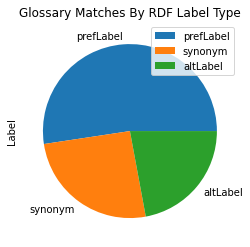

In [101]:
# pie chart by RDF term breakdown
matching['Label'].value_counts().plot(kind='pie', legend = True, title = 'Glossary Matches By RDF Label Type')